## 1 Import dependencies

In [20]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
from utils import *

## 2 Keypoints using mp holistic

In [ ]:
cap = cv2.VideoCapture(0)


with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame,holistic)
        # image, results = draw_landmarks(frame,holistic)
        # print(results.left_hand_landmarks)

        cv2.imshow("frame",frame)

        if cv2.waitKey(10) & 0xFF==ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Note-: Landmark values -> The face and hand landmarks models will return no values if nothing is detected.
The pose model will return landmarks but the visibility value inside of each landmark will be low  

In [ ]:
draw_landmarks(frame,results)

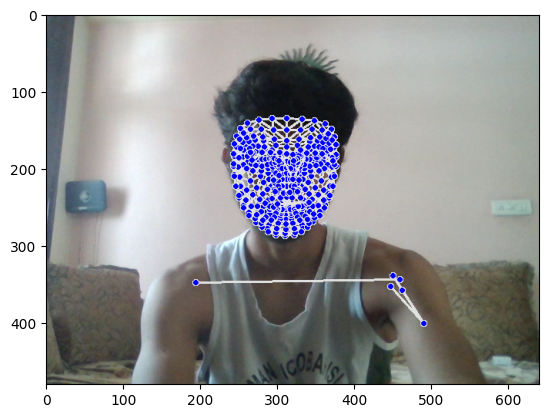

In [ ]:
img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
draw_landmarks(img,results)
plt.imshow(img)

In [59]:
# import sys
# sys.path.append("..")
from utils import draw_styled_landmarks

ImportError: cannot import name 'draw_styled_landmarks' from 'utils' (/home/rhythm/github/Projects/Sign-Language-Detection/notebook/../utils.py)

In [32]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [34]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret,frame = cap.read()

        # Make detections
        image,results = mediapipe_detection(frame,holistic)

        # Draw landmarks
        draw_styled_landmarks(image,results)

        # Show to screen
        cv2.imshow("Opencv feed",image)

        if cv2.waitKey(10) & 0xFF==ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

## 3 Extract keypoint values